In [1]:
!pip install torch torchvision timm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-8-b1f755e85f18>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_save_path, map_location=device))


Saving images (10).jpeg to images (10).jpeg
Tahmin Edilen Sınıf: Kizgin
Kizgin: 80.18%
Mutlu: 0.01%
Notr: 5.90%
Saskin: 0.05%
Uzgun: 13.87%


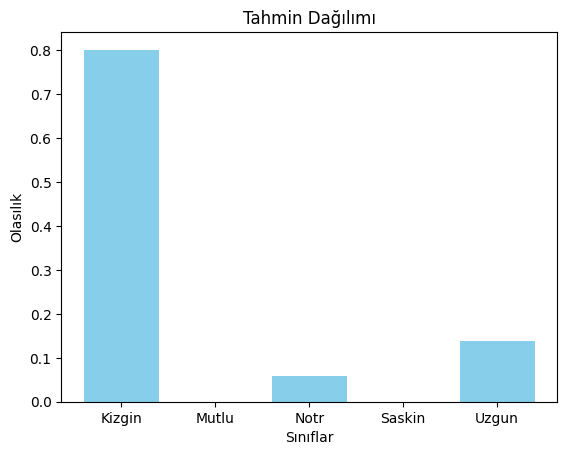

In [8]:
import torch
from torchvision import transforms, datasets
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
from timm import create_model

# GPU kullanımı
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dönüşümler (resim işleme)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# Veri setini yükleyerek sınıf isimlerini alma
test_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/dataset/test', transform=transform)
class_names = test_dataset.classes  # Klasörlerden alınan sınıf isimleri

# Modeli yükleme
model_save_path = '/content/drive/MyDrive/vit_model.pth'
model = create_model('vit_base_patch16_224', pretrained=False, num_classes=len(class_names))
model.load_state_dict(torch.load(model_save_path, map_location=device))
model.to(device)
model.eval()

# Tahmin fonksiyonu
def predict_image(image_path):
    image = Image.open(image_path).convert('RGB')
    input_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(input_tensor)
        probabilities = torch.softmax(outputs, dim=1).cpu().numpy()[0]
        predicted_class = np.argmax(probabilities)

    return predicted_class, probabilities

# Kullanıcıdan resim seçme
uploaded = files.upload()

# Yüklenen dosyanın işlenmesi
for file_name in uploaded.keys():
    predicted_class, probabilities = predict_image(file_name)

    # Tahmin sonuçlarını yazdırma
    print(f"Tahmin Edilen Sınıf: {class_names[predicted_class]}")
    for i, prob in enumerate(probabilities):
        print(f"{class_names[i]}: {prob * 100:.2f}%")

    # Sonuç grafiği
    plt.bar(class_names, probabilities, color='skyblue')
    plt.title("Tahmin Dağılımı")
    plt.xlabel("Sınıflar")
    plt.ylabel("Olasılık")
    plt.show()
